D_exp Median 19.50 Min 11.00 Max 36.00
PR-Corrected Mean 7.192 Min 5.272 Max 14.833
PR Mean 7.186 Min 5.269 Max 14.810


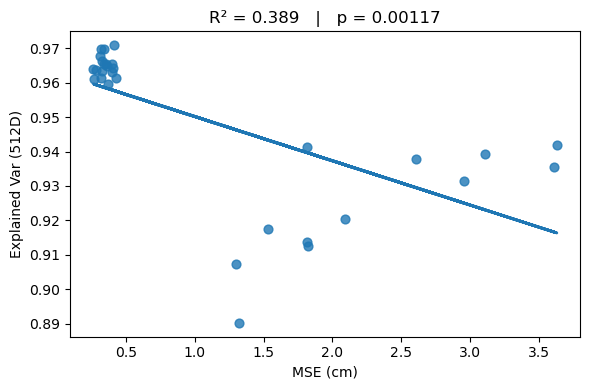

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# ── 1. Load and filter
df = pd.read_csv("metrics.csv")
df = df[~df["folder"].str.contains("warble", case=False, na=False)].reset_index(drop=True)

N_type = 5
# Participation Ratio for Effective Dimensionality
# Bias-Corrected Participation Ratio
print(f"D_exp Median {np.median(df["D_exp"].values):.2f} Min {np.min(df["D_exp"].values):.2f} Max {np.max(df["D_exp"].values):.2f}")
print(f"PR-Corrected Mean {np.mean(df["PR_C"].values):.3f} Min {np.min(df["PR_C"].values):.3f} Max {np.max(df["PR_C"].values):.3f}")
print(f"PR Mean {np.mean(df["PR"].values):.3f} Min {np.min(df["PR"].values):.3f} Max {np.max(df["PR"].values):.3f}")
# ── 2. Prepare X and y
x = df["val_loss_min"].values.reshape(-1, 1)
y = df["r2_raw"].values

# ── 3. Fit regression + stats
model  = LinearRegression().fit(x, y)
y_fit  = model.predict(x)
r2_lin = model.score(x, y)
rho, pval = pearsonr(df["val_loss_min"], df["r2_raw"])

# ── 4. Plot
plt.figure(figsize=(6, 4))
plt.scatter(df["val_loss_min"], df["r2_raw"], s=40, alpha=0.8, label="folders")
plt.plot(df["val_loss_min"], y_fit, linewidth=2, label="linear fit")
plt.xlabel("MSE (cm)")
plt.ylabel("Explained Var (512D)")
plt.title(f"R² = {r2_lin:.3f}   |   p = {pval*N_type:.3g}") # correction for multi-sample
# plt.legend()
plt.tight_layout()
plt.show()


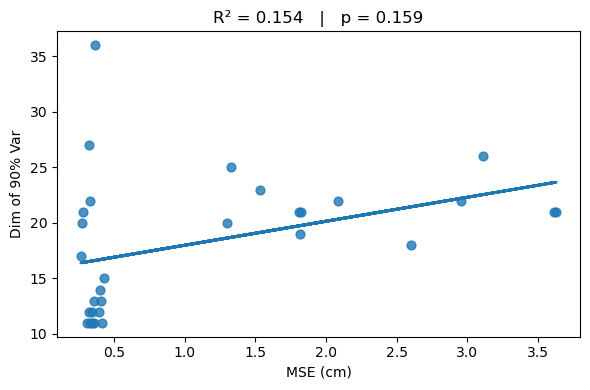

In [8]:
x = df["val_loss_min"].values.reshape(-1, 1)
y = df["D_exp"].values

# y[y>35] = np.median(y)

# ── 3. Fit regression + stats
model  = LinearRegression().fit(x, y)
y_fit  = model.predict(x)
r2_lin = model.score(x, y)
rho, pval = pearsonr(df["val_loss_min"], df["D_exp"])

# ── 4. Plot
plt.figure(figsize=(6, 4))
plt.scatter(df["val_loss_min"], df["D_exp"], s=40, alpha=0.8, label="folders")
plt.plot(df["val_loss_min"], y_fit, linewidth=2, label="linear fit")
plt.xlabel("MSE (cm)")
plt.ylabel("Dim of 90% Var")
plt.title(f"R² = {r2_lin:.3f}   |   p = {pval*N_type:.3g}")
# plt.legend()
plt.tight_layout()
plt.show()

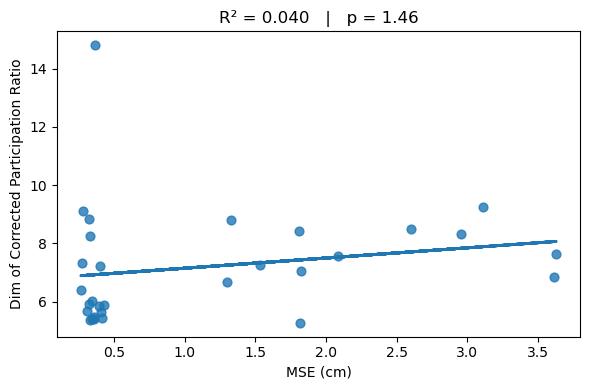

In [11]:
x = df["val_loss_min"].values.reshape(-1, 1)
y = df["PR_C"].values

# y[y>14] = np.median(y)

# ── 3. Fit regression + stats
model  = LinearRegression().fit(x, y)
y_fit  = model.predict(x)
r2_lin = model.score(x, y)
rho, pval = pearsonr(df["val_loss_min"], df["PR"])

# ── 4. Plot
plt.figure(figsize=(6, 4))
plt.scatter(df["val_loss_min"], df["PR"], s=40, alpha=0.8, label="folders")
plt.plot(df["val_loss_min"], y_fit, linewidth=2, label="linear fit")
plt.xlabel("MSE (cm)")
plt.ylabel("Dim of Corrected Participation Ratio")
plt.title(f"R² = {r2_lin:.3f}   |   p = {pval*N_type:.3g}")
# plt.legend()
plt.tight_layout()
plt.show()

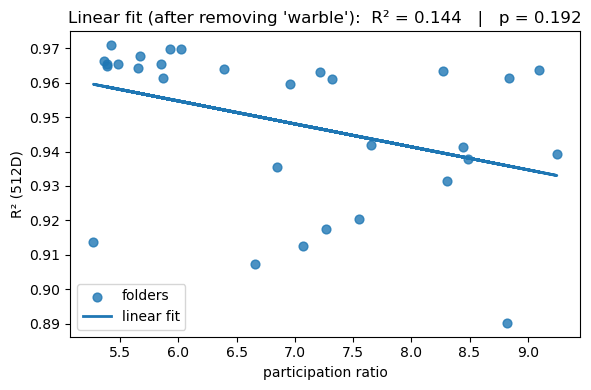

In [3]:
x = df["PR"].values.reshape(-1, 1)
y = df["r2_raw"].values

x[x>14] = np.median(x)

# ── 3. Fit regression + stats
model  = LinearRegression().fit(x, y)
y_fit  = model.predict(x)
r2_lin = model.score(x, y)
rho, pval = pearsonr(df["PR"], df["r2_raw"])

# ── 4. Plot
plt.figure(figsize=(6, 4))
plt.scatter(df["PR"], df["r2_raw"], s=40, alpha=0.8, label="folders")
plt.plot(df["PR"], y_fit, linewidth=2, label="linear fit")
plt.xlabel("participation ratio")
plt.ylabel("R² (512D)")
plt.title(f"Linear fit (after removing 'warble'):  R² = {r2_lin:.3f}   |   p = {pval*N_type:.3g}")
plt.legend()
plt.tight_layout()
plt.show()
